In [1]:
% matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('../Assets/Datasets/Outputs/ord_ModelReady.csv')
df.drop(['Unnamed: 0', 'origin_airport_code'], axis=1, inplace=True)

In [3]:
# Create train & test split
x = df.drop(['dep_delay_c'], axis=1)
y = df['dep_delay_c']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.7)


In [4]:
# Random Forest Classifier
clf = RandomForestClassifier(n_estimators = 100, min_samples_leaf=50,  n_jobs=-1)
clf.fit(x_train, y_train)
print 'Train Score: {}'.format(clf.score(x_train, y_train))
print 'Test Score: {}'.format(clf.score(x_test, y_test))

Train Score: 0.707553045005
Test Score: 0.692120880854


In [5]:
# Random Forest Feature importances
f_imp = pd.DataFrame(zip(x_train.columns, clf.feature_importances_), columns=['Feature', 'Importance'])
f_imp.head(15).sort_values(['Importance'], ascending = False)

,Feature,Importance
3,crs_dep_time_hours,0.160928
1,delta_time_min,0.141861
2,crs_dep_week,0.100593
4,orig_temp,0.098949
0,daily_departures,0.094715
8,seats,0.070482
5,orig_visibility,0.052850
6,orig_wind_speed,0.039820
7,orig_precip,0.023288
13,airline_Envoy Air,0.010926


In [6]:
# Confusion Matrix 
predictions = clf.predict(x_test)
cm = confusion_matrix(y_test, predictions)
cm = pd.DataFrame(cm, columns=['predict_no_delay', 'predict_delay'], index=['no_delay', 'delay'])
cm

,predict_no_delay,predict_delay
no_delay,212746,42316
delay,96249,98752


In [13]:
print classification_report(y_test, predictions)

             precision    recall  f1-score   support

          0       0.69      0.83      0.75    255062
          1       0.70      0.51      0.59    195001

avg / total       0.69      0.69      0.68    450063



ROC AUC: 0.74


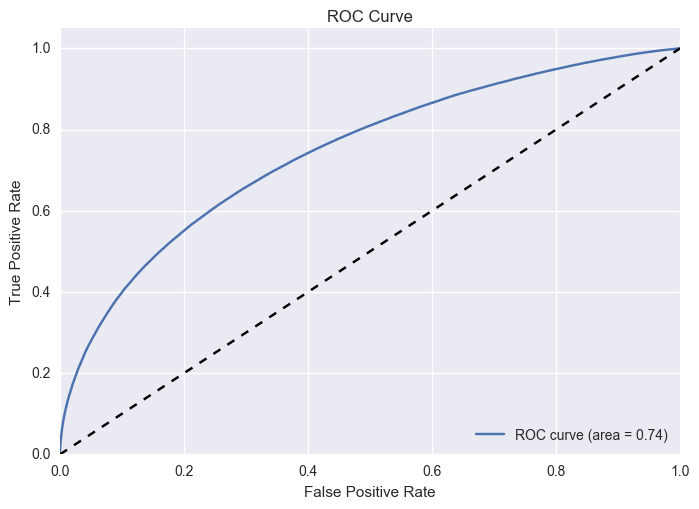

In [9]:
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print 'ROC AUC: %0.2f' % roc_auc
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [10]:
## returns confusion matrix and classification report based on different probability level

def tune_predictions(model, x_test, y_test, probability):
    predict = model.predict_proba(x_test)
    new_predictions = []
    for i in predict:
        if i[1] >= probability:
            new_predictions.append(1)
        else:
            new_predictions.append(0)
    print "Confusion Matrix:\n", pd.DataFrame(confusion_matrix(y_test, new_predictions), 
                                              columns=['predict_no_delay', 'predict_delay'],
                                              index=['no_delay', 'delay'])
    print "\nClassification Report:\n", classification_report(y_test, new_predictions)
    

In [11]:
tune_predictions(clf, x_test, y_test, .55)

Confusion Matrix:
          predict_no_delay  predict_delay
no_delay            229952          25110
delay               117757          77244

Classification Report:
             precision    recall  f1-score   support

          0       0.66      0.90      0.76    255062
          1       0.75      0.40      0.52    195001

avg / total       0.70      0.68      0.66    450063



41411